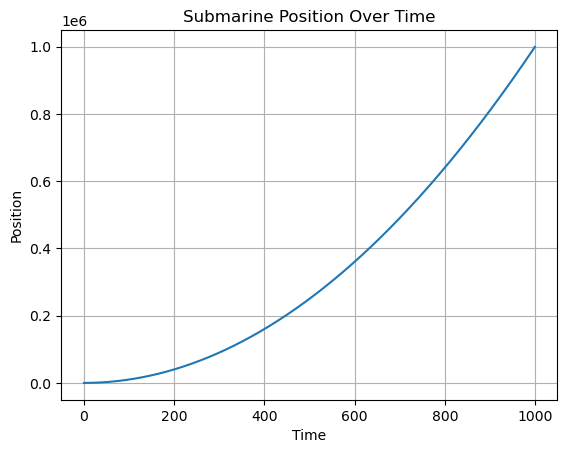

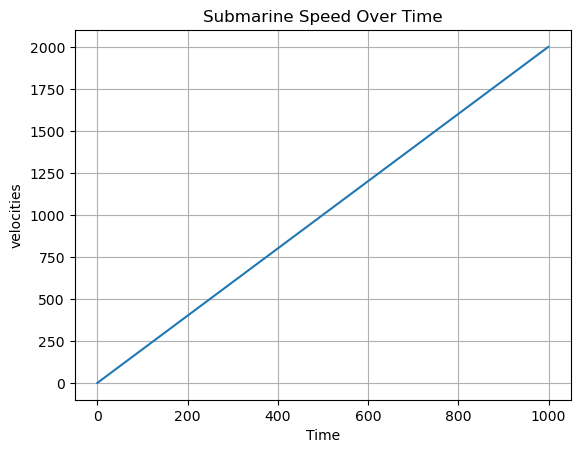

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_submarine_position(A, B, u, initial_state, dt, num_steps):
    """模拟潜水器的定位"""
    # 初始化位置和速度数组
    positions = np.zeros((num_steps,))
    velocities = np.zeros((num_steps,))
    
    # 设置初始状态
    x = initial_state
    
    # 迭代模拟
    for i in range(num_steps):
        # 计算下一个时间步长的状态
        x = np.dot(A, x) + np.dot(B, u)
        
        # 存储位置和速度
        positions[i] = x[0]
        velocities[i] = x[1]
    
    return positions, velocities

# 示例参数
dt = 1  # 时间步长
num_steps = 1000  # 模拟步数
m = 1000 # 潜水器质量
Fb = 2000 # 浮力
Fg = 9800 # 重力
Fc = 500 # 水流作用力
Fd = 500
# 初始状态
initial_state = np.array([0, 0])  # 初始位置和速度都为零

# 获取动力学方程的矩阵形式
A = np.array([[1, dt],
              [0, 1]])
B = np.array([[0, 0, 0, 0],
              [dt / m, 0, 0, 0]])
u = np.array([Fb, Fg, Fc, Fd])

# 模拟潜水器的定位
positions, velocities = simulate_submarine_position(A, B, u, initial_state, dt, num_steps)

# 绘制潜水器位置随时间的变化图
time = np.arange(0, num_steps * dt, dt)
plt.plot(time, positions)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Submarine Position Over Time')
plt.grid(True)
plt.show()

time = np.arange(0, num_steps * dt, dt)
plt.plot(time, velocities)
plt.xlabel('Time')
plt.ylabel('velocities')
plt.title('Submarine Speed Over Time')
plt.grid(True)
plt.show()


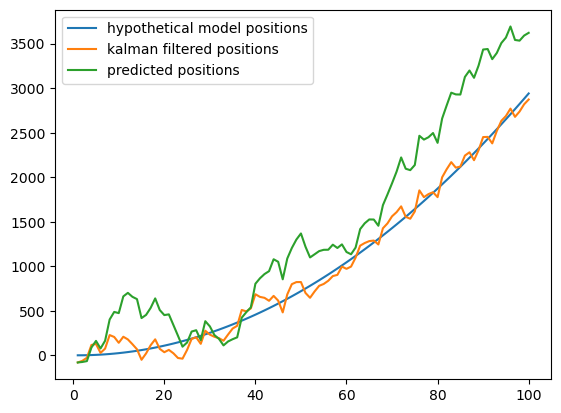

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(1, 100, 100)  # 在1~100s内采样100次
a = 0.6  
v0 = 0  
s0 = 0  
imu_var = 120 ** 2  # IMU测量误差方差，Q~N(0, imu_var)
gps_var = 50 ** 2  # GPS测量误差方差，R~N(0, gps_var)
num_samples = t.shape[0]

# 根据理想模型推导出来的真实位置值
real_positions = [0] * num_samples
real_positions[0] = s0
# 模拟观测值，通过理论值加上观测噪声模拟获得
measure_positions = [0] * num_samples
measure_positions[0] = real_positions[0] + np.random.normal(0, gps_var ** 0.5)
# 不使用卡尔曼滤波，也不使用实际观测值修正，单纯依靠运动模型来预估的预测值
predict_positions = [0] * num_samples
predict_positions[0] = measure_positions[0]
# 最优估计值，也就是卡尔曼滤波输出的真实值的近似逼近
optim_positions = [0] * num_samples
optim_positions[0] = measure_positions[0]
# 卡尔曼滤波算法的中间变量
pos_k_1 = optim_positions[0]

predict_var = 0
for i in range(1, t.shape[0]):
    # 根据理想模型获得当前的速度、位置真实值
    real_v = v0 + a * i
    real_pos = s0 + (v0 + real_v) * i / 2
    real_positions[i] = real_pos
    # 模拟输入数据，实际应用中从传感器测量获得
    v = real_v + np.random.normal(0, imu_var ** 0.5)
    measure_positions[i] = real_pos + np.random.normal(0, gps_var ** 0.5)
    # 如果仅使用运动模型来预测整个轨迹，而不使用观测值，则得到的位置如下
    predict_positions[i] = predict_positions[i - 1] + (v + v + a) * (i - (i - 1)) / 2
    # 以下是卡尔曼滤波的整个过程
    # 根据实际模型预测，利用上个时刻的位置（上一时刻的最优估计值）和速度预测当前位置
    pos_k_pred = pos_k_1 + v + a / 2
    # 更新预测数据的方差
    predict_var += gps_var
    # 求得最优估计值
    pos_k = pos_k_pred * imu_var / (predict_var + imu_var) + measure_positions[i] * predict_var / (
                predict_var + imu_var)
    # 更新
    predict_var = (predict_var * imu_var) / (predict_var + imu_var)
    pos_k_1 = pos_k
    optim_positions[i] = pos_k

plt.plot(t, real_positions, label='hypothetical model positions')
#plt.plot(t, measure_positions, label='measured positions')
plt.plot(t, optim_positions, label='kalman filtered positions')
plt.plot(t, predict_positions, label='predicted positions')
plt.legend()
plt.show()


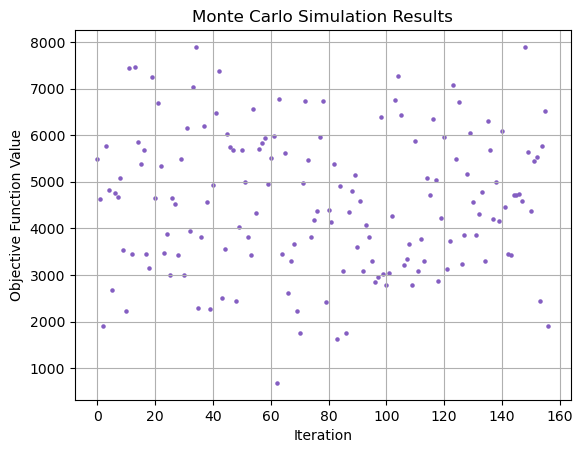

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 目标函数
# def objective_function(x):
#     return x[0]*14903.4 + x[1]*23355.1 + x[2]*12627.6 

#目标函数2
def objective_function(x):
    return x[0]*1031 + x[1]*1755.9 +x[2]*770.3

# 约束条件
def constraint1(x):
    return x[0] + x[1] + x[2] - 5


def constraint2(x):
    return x[0] 

def constraint3(x):
    return  x[1] 

def constraint4(x):
    return x[2] 

# 定义问题的上下界
bounds = [(0, 5)] * 5

# 定义蒙特卡洛模拟的次数
num_samples = 1000

# 初始化目标函数值列表
values = []

# 执行蒙特卡洛模拟
for _ in range(num_samples):
    # 生成随机解
    x = np.random.uniform(0, 5, size=5)
    
    # 检查是否满足约束条件
    if (constraint1(x) <= 0 and constraint2(x) > 0 and constraint3(x) > 0 and constraint4(x) > 0):
        # 计算目标函数值
        value = objective_function(x)
        
        # 添加到目标函数值列表中
        values.append(value)

# 绘制散点图
# 这段代码将每次随机得到的目标函数值绘制成散点图，横坐标为迭代次数，纵坐标为目标函数值。通过观察散点图，可以了解到目标函数值的分布情况。
plt.scatter(range(len(values)), values, s=5, color='#845EC2')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Monte Carlo Simulation Results')
plt.grid(True)
plt.show()

In [5]:
pip install pyecharts

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 8.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from pyecharts import options as opts
from pyecharts.charts import Pie
# 虚假数据
data_pair = [['Klein4000', 13903.4], ['MEPUS-AUV3000L', 20855.1], ['Falcon-DR', 10427.6]]

chart = Pie()
chart.add(
       '', 
       data_pair,
       # 仅通过扇形的ban
       rosetype='area'
       )
       
chart.render_notebook()

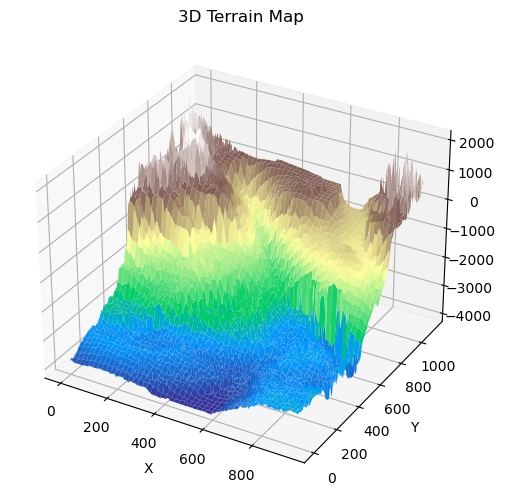

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D


def read_asc_file(file_path):
    """读取ASC文件，并返回地形数据"""
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        # 找到NODATA_value所在的行
        nodata_index = [i for i, line in enumerate(lines) if 'NODATA_value' in line][0]
        
        # 从NODATA_value所在的下一行开始读取数据
        data = [list(map(float, line.split())) for line in lines[nodata_index+1:]]
        data = np.array(data)
        
        # 获取行数和列数
        nrows, ncols = data.shape
        
        # 从ASCII文件中获取X、Y、Z坐标
        x = np.arange(0, ncols, 1)
        y = np.arange(0, nrows, 1)
        x, y = np.meshgrid(x, y)
        z = data[::-1]  # 将数据反转，使得坐标原点位于左下角
        return x, y, z


def plot_3d_terrain(x, y, z):
    """绘制3D地形图"""
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='terrain')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('')
    ax.set_title('3D Terrain Map')
    plt.show()

# ASC文件路径
asc_file_path = 'gebco_2023.asc'

# 读取ASC文件
x, y, z = read_asc_file(asc_file_path)

# 绘制3D地形图
plot_3d_terrain(x, y, z)


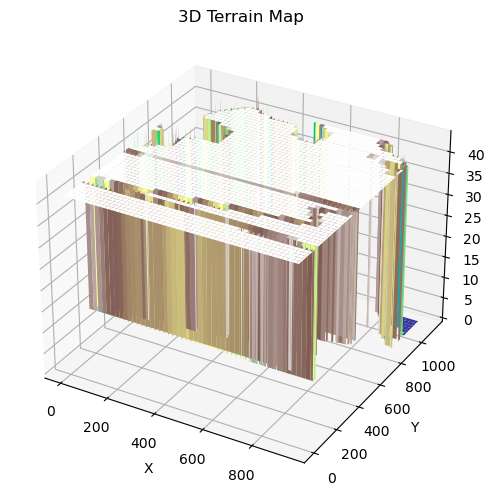

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D


def read_asc_file(file_path):
    """读取ASC文件，并返回地形数据"""
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        # 找到NODATA_value所在的行
        nodata_index = [i for i, line in enumerate(lines) if 'NODATA_value' in line][0]
        
        # 从NODATA_value所在的下一行开始读取数据
        data = [list(map(float, line.split())) for line in lines[nodata_index+1:]]
        data = np.array(data)
        
        # 获取行数和列数
        nrows, ncols = data.shape
        
        # 从ASCII文件中获取X、Y、Z坐标
        x = np.arange(0, ncols, 1)
        y = np.arange(0, nrows, 1)
        x, y = np.meshgrid(x, y)
        z = data[::-1]  # 将数据反转，使得坐标原点位于左下角
        return x, y, z


def plot_3d_terrain(x, y, z):
    """绘制3D地形图"""
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='terrain')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('')
    ax.set_title('3D Terrain Map')
    plt.show()

# ASC文件路径
asc_file_path = 'gebco_2023_tid.asc'

# 读取ASC文件
x, y, z = read_asc_file(asc_file_path)

# 绘制3D地形图
plot_3d_terrain(x, y, z)


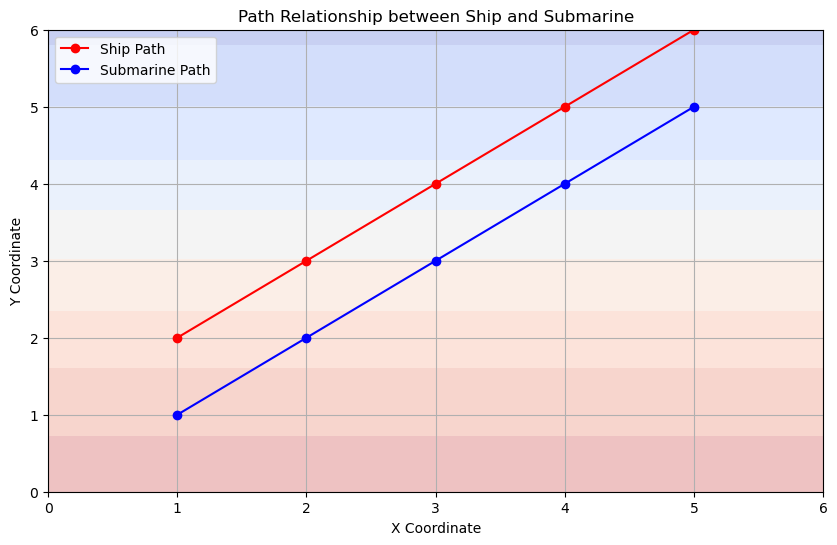

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# 生成模拟数据
# 主船路径
ship_path = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
# 潜水器路径
submarine_path = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])

# 构建特征和标签
X = np.concatenate([ship_path, submarine_path])
y = np.array([0] * len(ship_path) + [1] * len(submarine_path))  # 0表示主船，1表示潜水器

# 训练朴素贝叶斯分类器
clf = GaussianNB()
clf.fit(X, y)

# 可视化展示
plt.figure(figsize=(10, 6))

# 绘制主船路径
plt.plot(ship_path[:, 0], ship_path[:, 1], 'ro-', label='Ship Path')
# 绘制潜水器路径
plt.plot(submarine_path[:, 0], submarine_path[:, 1], 'bo-', label='Submarine Path')

# 构建网格来绘制决策边界
xx, yy = np.meshgrid(np.linspace(0, 6, 100), np.linspace(0, 6, 100))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.title('Path Relationship between Ship and Submarine')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()



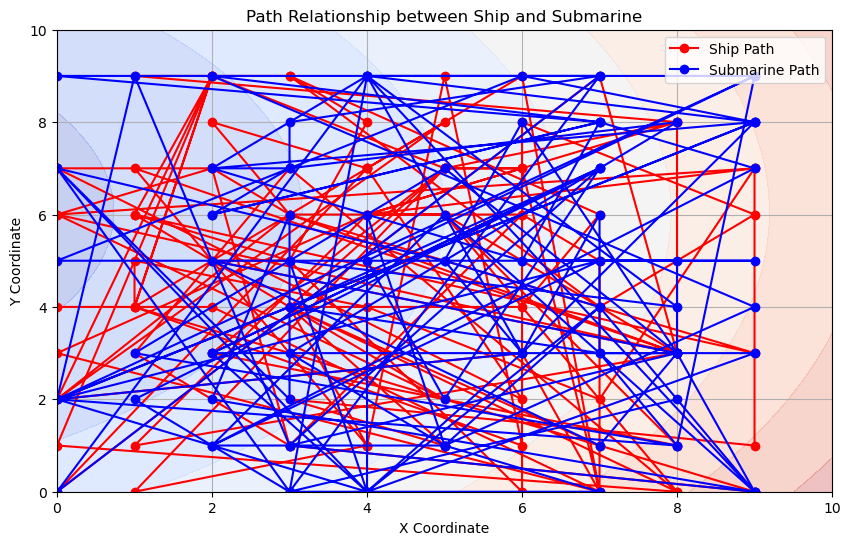

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# 生成模拟数据
# 生成主船路径
ship_path = np.random.randint(0, 10, size=(100, 2))
# 生成潜水器路径
submarine_path = np.random.randint(0, 10, size=(100, 2))

# 构建特征和标签
X = np.concatenate([ship_path, submarine_path])
y = np.array([0] * len(ship_path) + [1] * len(submarine_path))  # 0表示主船，1表示潜水器

# 训练朴素贝叶斯分类器
clf = GaussianNB()
clf.fit(X, y)

# 可视化展示
plt.figure(figsize=(10, 6))

# 绘制主船路径
plt.plot(ship_path[:, 0], ship_path[:, 1], 'ro-', label='Ship Path')
# 绘制潜水器路径
plt.plot(submarine_path[:, 0], submarine_path[:, 1], 'bo-', label='Submarine Path')

# 构建网格来绘制决策边界
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.title('Path Relationship between Ship and Submarine')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


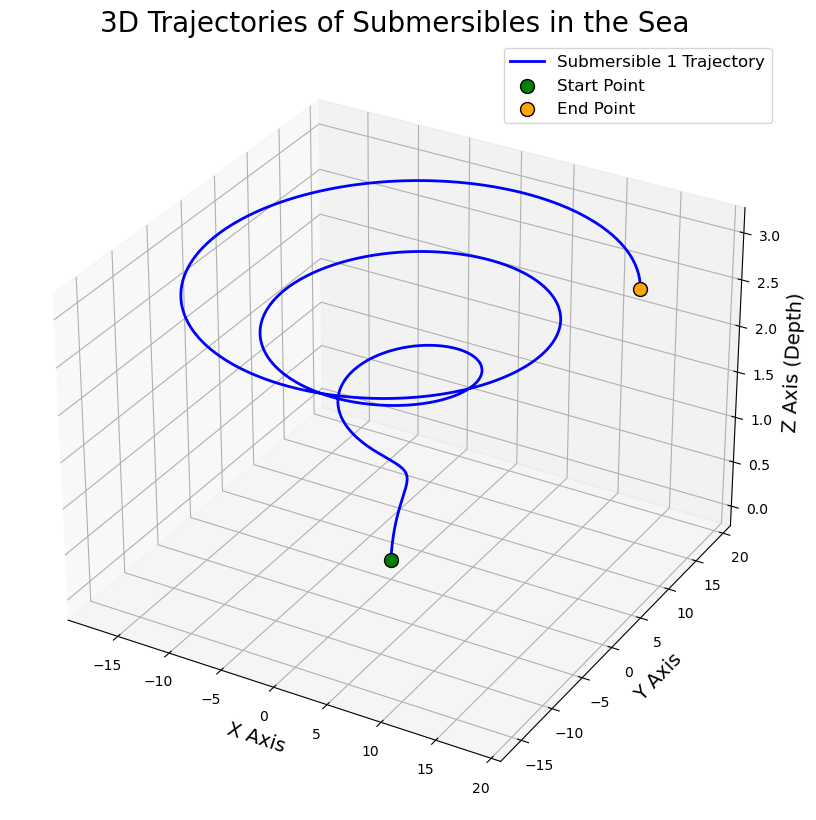

In [1]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 模拟潜水器在三维空间中的运动轨迹
t = np.linspace(0, 20, 1000)
x = t * np.sin(t)
y = t * np.cos(t)
z = np.log(t + 1)

# 模拟另一潜水器为对比
x2 = t * np.sin(t + 1)
y2 = t * np.cos(t + 1)
z2 = np.log(t + 0.5)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制潜水器的运动轨迹
ax.plot(x, y, z, label='Submersible 1 Trajectory', color='blue', linewidth=2)
#ax.plot(x2, y2, z2, label='Submersible 2 Trajectory', color='red', linestyle='--', linewidth=2)

# 标记起点和终点
ax.scatter(x[0], y[0], z[0], color='green', s=100, label='Start Point', edgecolor='black')
ax.scatter(x[-1], y[-1], z[-1], color='orange', s=100, label='End Point', edgecolor='black')

# 设置图形属性
ax.set_title('3D Trajectories of Submersibles in the Sea', fontsize=20)
ax.set_xlabel('X Axis', fontsize=14)
ax.set_ylabel('Y Axis', fontsize=14)
ax.set_zlabel('Z Axis (Depth)', fontsize=14)
ax.legend(fontsize=12)

plt.show()

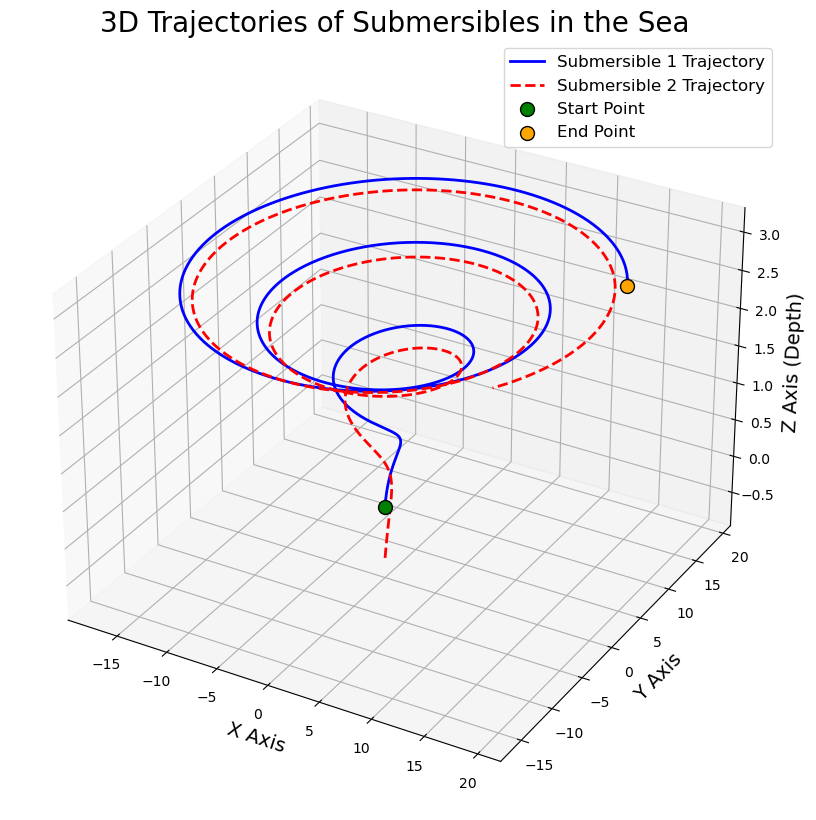

In [3]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 模拟潜水器在三维空间中的运动轨迹
t = np.linspace(0, 20, 1000)
x = t * np.sin(t)
y = t * np.cos(t)
z = np.log(t + 1)

# 模拟另一潜水器为对比
x2 = t * np.sin(t + 1)
y2 = t * np.cos(t + 1)
z2 = np.log(t + 0.5)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制潜水器的运动轨迹
ax.plot(x, y, z, label='Submersible 1 Trajectory', color='blue', linewidth=2)
ax.plot(x2, y2, z2, label='Submersible 2 Trajectory', color='red', linestyle='--', linewidth=2)

# 标记起点和终点
ax.scatter(x[0], y[0], z[0], color='green', s=100, label='Start Point', edgecolor='black')
ax.scatter(x[-1], y[-1], z[-1], color='orange', s=100, label='End Point', edgecolor='black')

# 设置图形属性
ax.set_title('3D Trajectories of Submersibles in the Sea', fontsize=20)
ax.set_xlabel('X Axis', fontsize=14)
ax.set_ylabel('Y Axis', fontsize=14)
ax.set_zlabel('Z Axis (Depth)', fontsize=14)
ax.legend(fontsize=12)

plt.show()

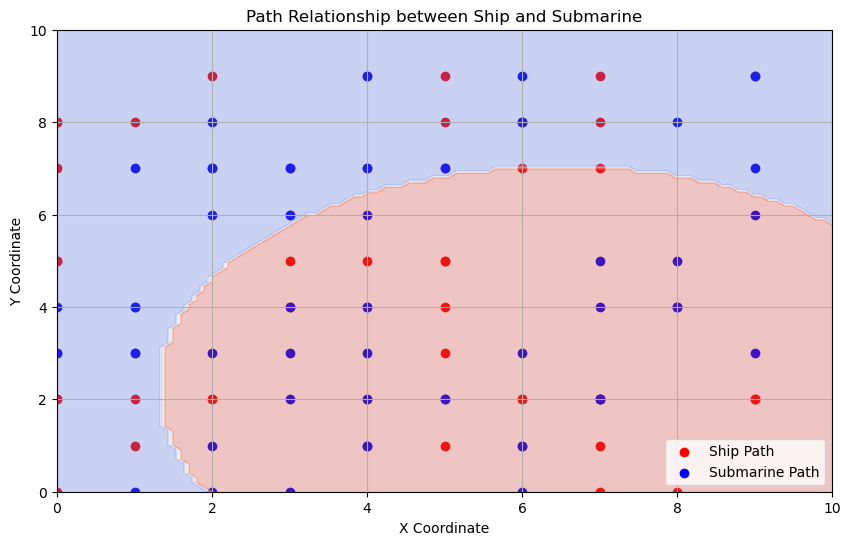

网格预测结果：
 [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# 生成模拟数据
# 主船路径
ship_path = np.random.randint(0, 10, size=(50, 2))
# 潜水器路径
submarine_path = np.random.randint(0, 10, size=(50, 2))

# 构建特征和标签
X = np.concatenate([ship_path, submarine_path])
y = np.array([0] * len(ship_path) + [1] * len(submarine_path))  # 0表示主船，1表示潜水器

# 训练朴素贝叶斯分类器
clf = GaussianNB()
clf.fit(X, y)

# 生成网格预测数据
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 可视化展示
plt.figure(figsize=(10, 6))

# 绘制主船路径
plt.scatter(ship_path[:, 0], ship_path[:, 1], c='r', label='Ship Path')
# 绘制潜水器路径
plt.scatter(submarine_path[:, 0], submarine_path[:, 1], c='b', label='Submarine Path')

# 绘制网格预测结果
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.title('Path Relationship between Ship and Submarine')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

# 打印模型预测结果
print("网格预测结果：\n", Z)


In [9]:
pip install pyecharts

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


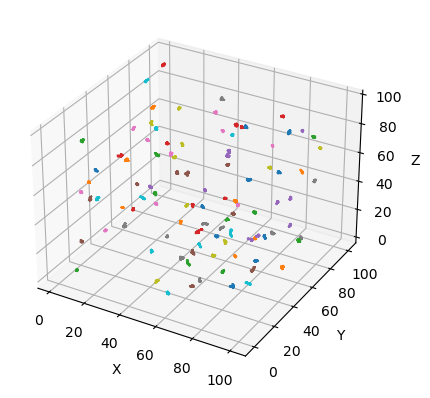

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def simulate_submarine_coordinates(num_submarines, duration, step_size):
    coordinates = []
    for i in range(num_submarines):
        x = np.random.uniform(0, 100)  # 模拟x坐标
        y = np.random.uniform(0, 100)  # 模拟y坐标
        z = np.random.uniform(0, 100)  # 模拟z坐标
        submarine_path = []
        for t in range(duration):
            x += np.random.normal(0, 0.1)  # 添加随机扰动模拟航行
            y += np.random.normal(0, 0.1)
            z += np.random.normal(0, 0.1)
            submarine_path.append([x, y, z])
        coordinates.append(submarine_path)
    return coordinates

# 模拟参数
num_submarines = 100  # 潜水器数量
duration = 100  # 模拟持续时间
step_size = 1  # 时间步长

# 模拟潜水器坐标
submarine_coordinates = simulate_submarine_coordinates(num_submarines, duration, step_size)

# 3D可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for submarine_path in submarine_coordinates:
    submarine_path = np.array(submarine_path)
    ax.plot(submarine_path[:, 0], submarine_path[:, 1], submarine_path[:, 2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


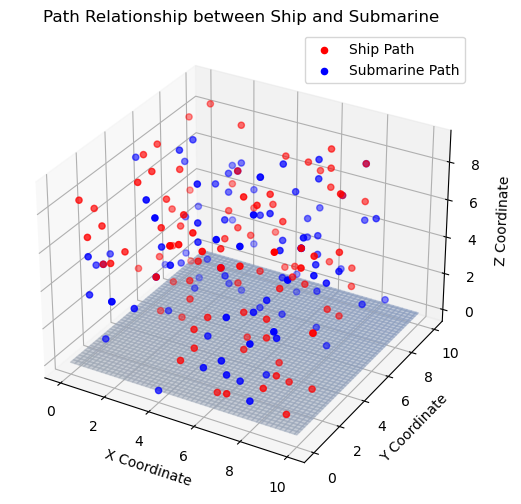

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# 生成模拟数据
# 生成主船路径
ship_path = np.random.randint(0, 10, size=(100, 3))
# 生成潜水器路径
submarine_path = np.random.randint(0, 10, size=(100, 3))

# 构建特征和标签
X = np.concatenate([ship_path, submarine_path])
y = np.array([0] * len(ship_path) + [1] * len(submarine_path))  # 0表示主船，1表示潜水器

# 训练支持向量机分类器
clf = SVC(kernel='linear', probability=True)
clf.fit(X, y)

# 可视化展示
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 绘制主船路径
ax.scatter(ship_path[:, 0], ship_path[:, 1], ship_path[:, 2], c='r', marker='o', label='Ship Path')
# 绘制潜水器路径
ax.scatter(submarine_path[:, 0], submarine_path[:, 1], submarine_path[:, 2], c='b', marker='o', label='Submarine Path')

# 构建网格来绘制决策边界
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])[:, 1]
Z = Z.reshape(xx.shape)
ax.plot_surface(xx, yy, np.zeros_like(xx), facecolors=plt.cm.coolwarm(Z), alpha=0.5)

ax.set_title('Path Relationship between Ship and Submarine')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.legend()

plt.show()


In [3]:
pip install bayesian-optimization


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.5
    Uninstalling colorama-0.4.5:
      Successfully uninstalled colorama-0.4.5
Note: you may need to restart the kernel to use updated packages.


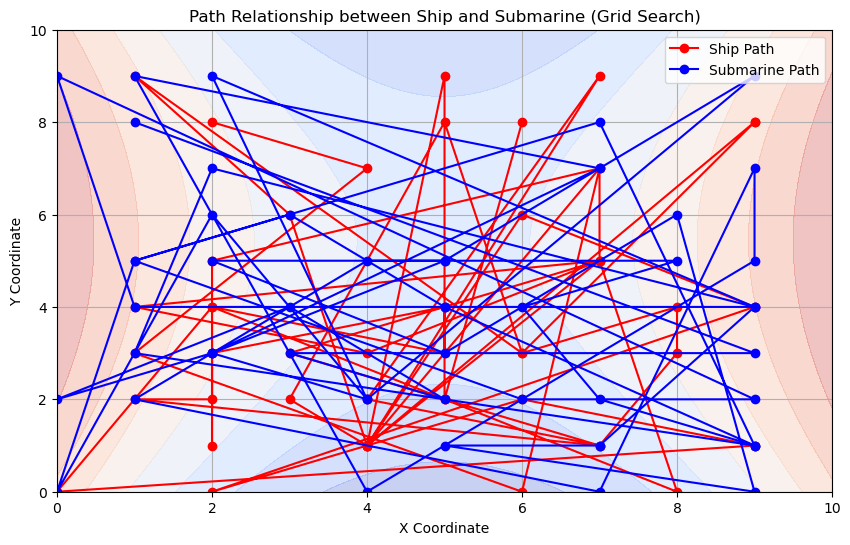

Best Parameters: {'var_smoothing': 0.03511191734215131}


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# 生成模拟数据
# 生成主船路径
ship_path = np.random.randint(0, 10, size=(50, 2))
# 生成潜水器路径
submarine_path = np.random.randint(0, 10, size=(50, 2))

# 构建特征和标签
X = np.concatenate([ship_path, submarine_path])
y = np.array([0] * len(ship_path) + [1] * len(submarine_path))  # 0表示主船，1表示潜水器

# 定义参数网格
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# 初始化朴素贝叶斯分类器
clf = GaussianNB()

# 网格搜索
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X, y)

# 获取最佳模型
best_clf = grid_search.best_estimator_

# 可视化展示
plt.figure(figsize=(10, 6))

# 绘制主船路径
plt.plot(ship_path[:, 0], ship_path[:, 1], 'ro-', label='Ship Path')
# 绘制潜水器路径
plt.plot(submarine_path[:, 0], submarine_path[:, 1], 'bo-', label='Submarine Path')

# 构建网格来绘制决策边界
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
Z = best_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.title('Path Relationship between Ship and Submarine (Grid Search)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)


In [2]:
pip install tensorflow

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 13.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 238.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 214.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 32.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 202.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 16.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 12.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.1 MB/s eta 0:00:00a 0:00:01
     ━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 103.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 295.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 271.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 240.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 260.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.0 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.3 which is incompatible.
numba 0.55.2 requires numpy<1.23,>=1.18, but you have numpy 1.26.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


Episode: 0, Rewards: [0.8536143130449126, 0.19559243698515372, 0.3900738467759328]
1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 19ms/step


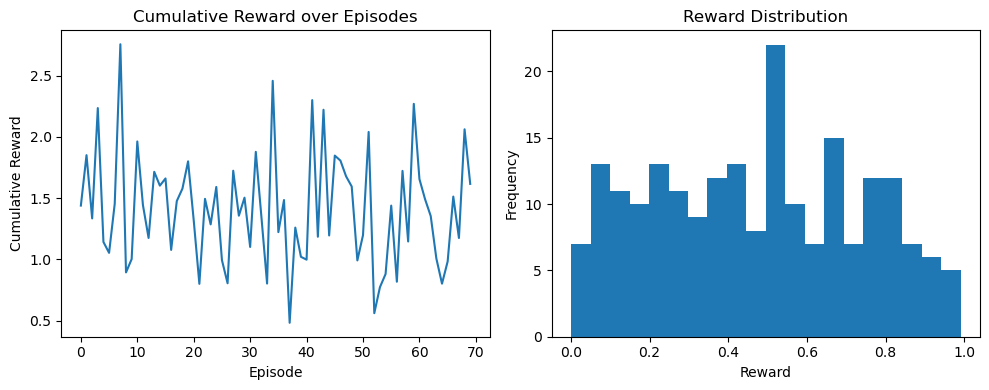

In [2]:
import numpy as np
import random
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # 折扣率
        self.epsilon = 1.0  # 探索率
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(tf.keras.layers.Dense(24, activation='relu'))
        model.add(tf.keras.layers.Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state[np.newaxis, :])
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        if len(self.memory) < batch_size:  # 检查内存中是否有足够的样本
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state[np.newaxis, :])[0])
            target_f = self.model.predict(state[np.newaxis, :])
            target_f[0][action] = target
            self.model.fit(state[np.newaxis, :], target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay



class Environment:
    def __init__(self):
        self.state_size = 4
        self.action_size = 2
        self.agents = [DQNAgent(self.state_size, self.action_size) for _ in range(3)]
        self.episode_rewards = []

    def step(self, actions):
        rewards = [0] * len(self.agents)
        for i, agent in enumerate(self.agents):
            state = np.random.rand(self.state_size)
            next_state = np.random.rand(self.state_size)
            reward = np.random.rand()
            agent.remember(state, actions[i], reward, next_state, False)
            rewards[i] = reward
        return rewards

    def run(self, episodes=70):
        episode_rewards = []
        for e in range(episodes):
            actions = [agent.act(np.random.rand(self.state_size)) for agent in self.agents]
            rewards = self.step(actions)
            episode_rewards.extend(rewards)
            self.episode_rewards.append(sum(rewards))
            for i, agent in enumerate(self.agents):
                agent.replay(32)
            if e % 100 == 0:
                print("Episode: {}, Rewards: {}".format(e, rewards))

        # 绘制累积奖励曲线
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(range(episodes), self.episode_rewards)
        plt.xlabel('Episode')
        plt.ylabel('Cumulative Reward')
        plt.title('Cumulative Reward over Episodes')

        # 绘制奖励分布直方图
        plt.subplot(1, 2, 2)
        plt.hist(episode_rewards, bins=20)
        plt.xlabel('Reward')
        plt.ylabel('Frequency')
        plt.title('Reward Distribution')
        plt.tight_layout()
        plt.show()

env = Environment()
env.run()


In [6]:
import json
import numpy as np
''''模拟生成10000个3维坐标，以json格式输出，可用于贝叶斯训练  '''
def simulate_submarine_coordinates(num_submarines, duration, step_size):
    coordinates = []
    for i in range(num_submarines):
        x = np.random.uniform(0, 100)  # 模拟x坐标
        y = np.random.uniform(0, 100)  # 模拟y坐标
        z = np.random.uniform(0, 100)  # 模拟z坐标
        submarine_path = []
        for t in range(duration):
            x += np.random.normal(0, 0.1)  # 添加随机扰动模拟航行
            y += np.random.normal(0, 0.1)
            z += np.random.normal(0, 0.1)
            submarine_path.append([x, y, z])
        coordinates.append(submarine_path)
    return coordinates

# 模拟参数
num_submarines = 100  # 潜水器数量
duration = 100  # 模拟持续时间
step_size = 1  # 时间步长

# 模拟潜水器坐标
submarine_coordinates = simulate_submarine_coordinates(num_submarines, duration, step_size)

# 将结果保存为JSON格式
output_json = json.dumps(submarine_coordinates)

# 输出JSON格式数据
print(output_json)


[[[95.75586428713156, 83.86522221324083, 7.6603084854066035], [95.80431120730434, 83.8357627086419, 7.6872490010883965], [95.76731773450638, 83.79659468538976, 7.8154771347836665], [95.77247440070391, 83.84756153676872, 7.743065755812612], [95.72654060244034, 83.80645792753613, 7.8422628450542256], [95.69804395726405, 83.77059144686108, 7.932269458205818], [95.66860368097652, 83.82455578217115, 8.124729538531136], [95.75173824184796, 83.92099527219688, 8.217885483964045], [95.67172829660824, 84.02950223386726, 8.196235643887833], [95.73606924210176, 83.92441442481525, 8.051047445254536], [95.76203417113979, 83.9922987848919, 7.965179216070102], [95.91789650956542, 83.95926514050463, 7.83608027468415], [95.90588668534322, 83.80982305528111, 7.670236268159432], [95.80385389577167, 83.92840517848289, 7.787216222140161], [95.66887063895487, 83.80337483281846, 7.892116113413452], [95.66906496088426, 83.76340585215989, 7.819099312008879], [95.66935375417242, 83.72093544216995, 7.783787176384